In [1]:
import pandas as pd
import seaborn as sns

In [2]:
insurance_data=pd.read_csv("12_1_insurance.csv")

In [3]:
insurance_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='bmi', ylabel='charges'>

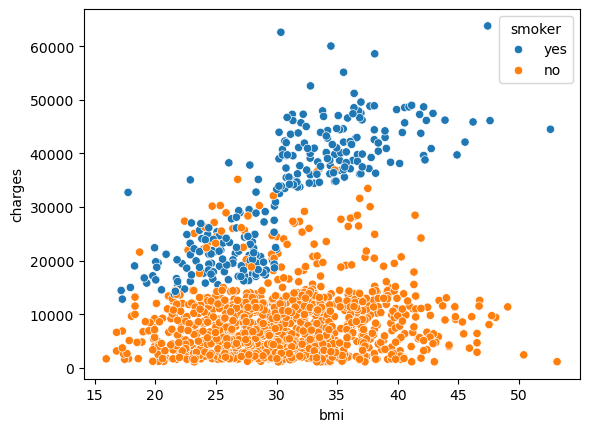

In [4]:
sns.scatterplot(x=insurance_data["bmi"],y=insurance_data["charges"],hue=insurance_data["smoker"])

In [5]:
# X=insurance_data.drop("charges",axis=1)
X=insurance_data.drop(columns=["charges","region"])
y=insurance_data["charges"]

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})

In [6]:
X.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
X_test.head()

,age,sex,bmi,children,smoker
764,45,1,25.175,2,0
887,36,1,30.020,0,0
890,64,1,26.885,0,1
1293,46,0,25.745,3,0
259,19,0,31.920,0,1


In [9]:
# Train Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Predict values
y_pred = model.predict(X_test)

In [11]:
y_pred

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [12]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [13]:
#Evalute model(only on testing data)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

n=X_test.shape[0]
p=X_test.shape[1]
adjusted_r2=1-((1-r2)*(n-1)/(n-p-1))
print("adjusted_r2:",adjusted_r2)

0.7811302113434095
adjusted_r2: 0.7769533069797342


In [14]:
X_test.shape

(268, 5)

In [15]:
#2 One hot encoding
X=insurance_data.drop(["charges"],axis=1)
y=insurance_data["charges"]
#feature engineering(one hot)
X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int)

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})




In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print("r2:",r2)

r2: 0.7835929767120723


In [17]:
#Interaction feature
X=insurance_data.drop(["charges"],axis=1)
y=insurance_data["charges"]
X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int)

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})

#
X["smoker_age"]=X["smoker"] * X["age"] 
X["smoker_bmi"]=X["smoker"] * X["bmi"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print("r2:",r2)

r2: 0.865231697953168


In [19]:
#is model overfit or underfit
# r2 training and r2 testing is low-underfit
# r2 training data is very high,
y_pred_train=model.predict(X_train)
r2_train=r2_score(y_train,y_pred_train) #performance of model on the same data it was trained with
print(r2_train)
print(r2)#unusual case bocz data must be noisy or testing data is small,therefore r2 for testing data is more

0.8340713711218875
0.865231697953168
